In [ ]:
  !pip install tf-nightly

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import all libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import  models
from tensorflow.keras.models import Sequential
from IPython.display import Image


get dataset from google drive

In [3]:
import pathlib
path_dataset_drive = "/content/drive/MyDrive/mask" 
dataset_dir = pathlib.Path(path_dataset_drive)

Define the dataset of data to Train.

In [4]:
batch_size = 16
img_height = 180
img_width = 180

here we need to make all images in one dimension (same width and same height),then we will
split all the images into 80% train images and 20% validation images.

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 376 files belonging to 2 classes.
Using 301 files for training.
Found 376 files belonging to 2 classes.
Using 75 files for validation.




display all classes names in our dataset

In [6]:
class_dataset = train_ds.class_names
print(class_dataset)

['with mask', 'without mask']


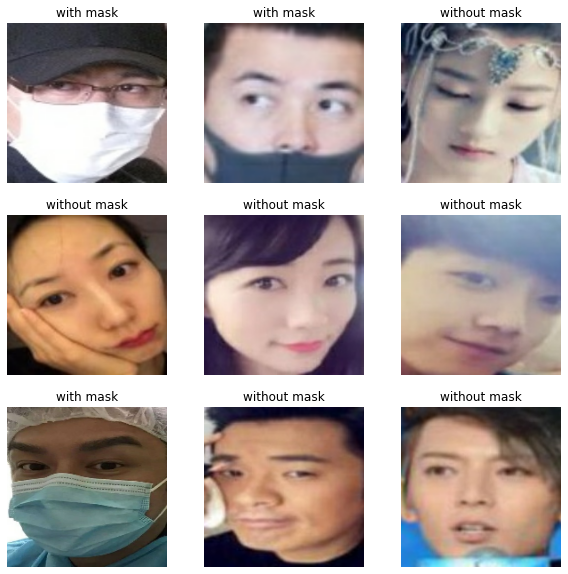

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
      for i in range(9):
          ax = plt.subplot(3, 3, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_dataset[labels[i]])
          plt.axis("off")

Perform normalization to convert color values in accordance with CNN

In [22]:
normalization_layer =layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


2. let's define the CNN Model,
our model is DNN + CNN (Dense neural network + Convolotional neural network).
here we use in the first layer 16 filter with 3*3 in dimension, the padding is same so we will not use zero padding , and the activation function is relu(same for the other layers.) after that we will use the maxpooling function so we cun reduce the dimentions of our feature maps.the we will use these feature maps as an input for our DNN . 

In [23]:
num_classes = 2
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

Set num_classes to 8- because there are 8 classes in our dataset.

3. now it's time to compile the model and we will use the adam optimizer


In [24]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

4. last step is to train the model .
epochs: Is the number in the Train

In [25]:

history = model.fit(train_ds,validation_data=val_ds,epochs=4)

Epoch 1/4
19/19 [==============================] - 12s 564ms/step - loss: 0.5986 - accuracy: 0.7110 - val_loss: 0.1354 - val_accuracy: 0.9733
Epoch 2/4
19/19 [==============================] - 10s 539ms/step - loss: 0.2131 - accuracy: 0.9402 - val_loss: 0.1994 - val_accuracy: 0.9467
Epoch 3/4
19/19 [==============================] - 10s 540ms/step - loss: 0.0927 - accuracy: 0.9734 - val_loss: 0.3122 - val_accuracy: 0.9200
Epoch 4/4
19/19 [==============================] - 11s 564ms/step - loss: 0.0840 - accuracy: 0.9734 - val_loss: 0.3371 - val_accuracy: 0.9067


results


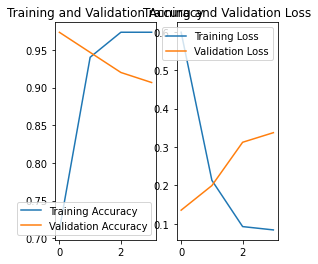

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(4)
plt.figure(figsize=(4, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

it's time to do some predections

In [ ]:
#@title <font size="5">← ឵឵<i>Upgrade FFmpeg to v4.2.2</font> { vertical-output: true }
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/yunooooo/gcct/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip install git+git://github.com/AWConant/jikanpy.git')
os.system('add-apt-repository -y ppa:jonathonf/ffmpeg-4')
os.system('apt-get update')
os.system('apt install mediainfo')
os.system('apt-get install ffmpeg')
clear_output()
print('Installation finished.')

Installation finished.


In [ ]:
!ffmpeg

In [ ]:
!ffmpeg -i /content/JeffWho_.mp4 /content/frames2/frame%06d.png

ffmpeg version 4.3.2-0york0~18.04 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version='0york0~18.04' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab

In [14]:
import cv2 #opencv itself

import numpy as np # matrix manipulations

predection is for with mask with a 99.51percent confidence.


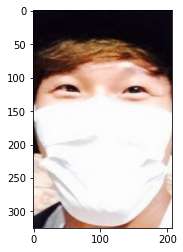

In [33]:
path="/content/drive/MyDrive/mask/with mask/0_0_0 copy 3.png"
base_image = cv2.imread(path)
img=keras.preprocessing.image.load_img(
    path,target_size=(img_height,img_width)
)
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)
predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(base_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
print("predection is for {} with a {:.2f}percent confidence.".format(class_dataset[np.argmax(score)],100*np.max(score)))


save the model as tflite file . so we can use it with opencv

In [34]:
saved_model_dir = '/content/TFLite'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

labels = '\n'.join(class_dataset)

with open('labels.txt', 'w') as f:
  f.write(labels)

INFO:tensorflow:Assets written to: /content/TFLite/assets
